# **Enhancing Credit Risk Predictions through Machine Learning Models**  
### <span style="color:blue;">Final Project Data Scientist at Home Credit Indonesia</span>  
**Author:** Anisa Nurhajiza




### Introduction:

This project focuses on building a model to predict whether a client can repay their loan on time or will face difficulties.

- **Supervised Learning:**  
  The training data includes labels (`TARGET`), which the model uses to learn and make predictions on new data.

- **Classification Problem:**  
  This is a binary classification problem where:
  - `0` means the client will repay the loan on time.
  - `1` means the client may have trouble repaying the loan.

---

### Data

The data is provided by [Home Credit](https://www.homecredit.co.id/tentang-perusahaan), a company that offers loans to people without access to traditional banking services.

#### Data Sources
The dataset contains information from seven different sources:

1. **application_train/application_test**  
   The main training and testing data. Each row represents a loan application identified by `SK_ID_CURR`.  
   The training data includes a `TARGET` column:  
   - `0`: The loan was repaid.  
   - `1`: The loan was not repaid.

2. **bureau**  
   Information about the client’s past credits from other financial institutions. Each row represents one previous credit, and a single application in the main dataset can link to multiple past credits.

3. **bureau_balance**  
   Monthly data about the credits in `bureau`. Each row is one month of data for a previous credit.

4. **previous_application**  
   Details about the client’s past loan applications with Home Credit. Each row represents one past application, identified by `SK_ID_PREV`.

5. **POS_CASH_BALANCE**  
   Monthly data about past point-of-sale or cash loans with Home Credit. Each row is one month of data for a previous loan.

6. **credit_card_balance**  
   Monthly data about the client’s past credit cards with Home Credit. Each row represents one month of data for a single credit card.

7. **installments_payment**  
   Payment history for the client’s past loans with Home Credit. Each row shows either a completed or missed payment.

---

### Data Relationships

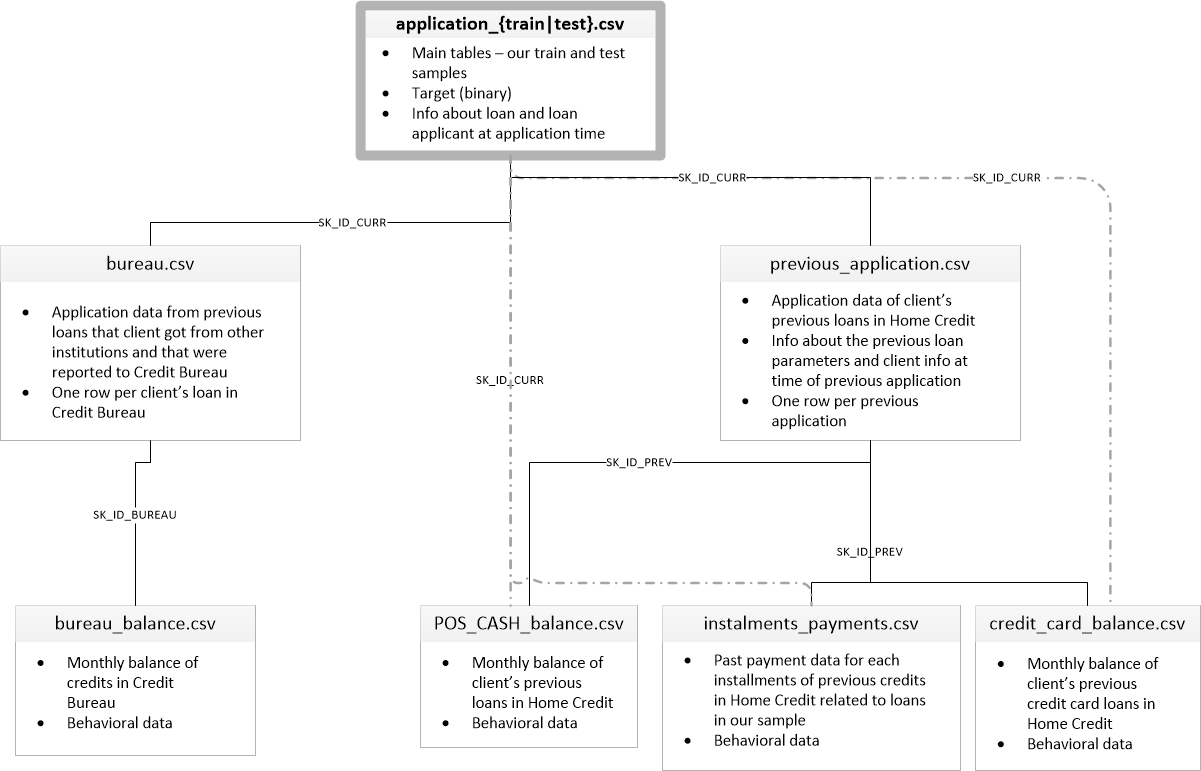


The diagram provided shows how these datasets are connected. For example:  
- The main dataset (`application_train`) links to `bureau` and `previous_application` through a unique ID (`SK_ID_CURR`).  
- Monthly data tables like `bureau_balance` and `credit_card_balance` connect to the previous data through IDs like `SK_ID_PREV`.

---

### Approach

This project focuses solely on the main training and testing datasets (`application_train` and `application_test`). Although the additional datasets offer more information, the approach will remain simple by utilizing only the main data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read in Data

There are a total of 9 files: 1 main file for training (with target) 1 main file for testing (without the target), 1 example submission file and 6 other files containing additional information about each loan.

In [ ]:
# Load datasets
train_data = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/application_train.csv")
test_data = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/application_test.csv")
bureau = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/bureau.csv")
bureau_balance = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/bureau_balance.csv")
pos_cash_balance = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/POS_CASH_balance.csv")
credit_card_balanc = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/credit_card_balance.csv")
previous_application = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/previous_application.csv")
installments_payments = pd.read_csv("/content/drive/My Drive/Rakamin Academy/Home Credit Indonesia/installments_payments.csv")

In [ ]:
# data application (train)
print('This dataset has %d rows dan %d columns.\n' % train_data.shape)
pd.set_option('display.max_columns', None)
train_data.head()

This dataset has 307511 rows dan 122 columns.



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
train_data.shape

(307511, 122)

In [ ]:
train_data['SK_ID_CURR'].nunique()

307511

In [ ]:
train_data['TARGET'].value_counts() #imbalance dataset

,count
TARGET,
0,282686
1,24825


The training dataset consists of 307,511 entries, each representing a unique loan application, and contains 122 variables, including the `TARGET`, which is the label to be predicted.

In [ ]:
# data application (test)
print('This dataset has %d rows dan %d columns.\n' % test_data.shape)
pd.set_option('display.max_columns', None)
test_data.head()

This dataset has 48744 rows dan 121 columns.



,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,0.789654,0.159520,0.0660,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0505,NaN,NaN,0.0672,0.0612,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0526,NaN,NaN,0.0666,0.0590,0.9732,NaN,NaN,NaN,0.1379,0.125,NaN,NaN,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,0.291656,0.432962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,0.699787,0.610991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married

The test dataset is significantly smaller and does not include the `TARGET` column.

In [ ]:
# bureau
print('This dataset has %d rows dan %d columns.\n' % bureau.shape)
pd.set_option('display.max_columns', None)
bureau.head()

This dataset has 1716428 rows dan 17 columns.



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
# Select the last entry for each client (SK_ID_CURR) in the bureau dataset
bureau_agg = bureau.groupby('SK_ID_CURR').last().reset_index()

In [ ]:
bureau_agg.shape

(305811, 17)

In [ ]:
bureau_agg.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,100001,5896636,Active,currency 1,-320,0,411.0,-1328.0,NaN,0,168345.0,110281.5,0.0,0.0,Consumer credit,-10,9364.5
1,100002,6113835,Closed,currency 1,-1043,0,62.0,-967.0,0.0,0,67500.0,245781.0,0.0,0.0,Credit card,-758,0.0
2,100003,5885880,Active,currency 1,-606,0,1216.0,-621.0,0.0,0,810000.0,0.0,810000.0,0.0,Credit card,-43,NaN
3,100004,6829134,Closed,currency 1,-408,0,-382.0,-382.0,0.0,0,94537.8,0.0,0.0,0.0,Consumer credit,-382,NaN
4,100005,6735202,Active,currency 1,-62,0,122.0,-123.0,0.0,0,29826.0,25321.5,0.0,0.0,Consumer credit,-31,4261.5


# Exploratory Data Analysis

In [ ]:
train_data['TARGET'].value_counts()

,count
TARGET,
0,282686
1,24825


In [ ]:
train_data['TARGET'].value_counts() / train_data.shape[0] * 100

,count
TARGET,
0,91.927118
1,8.072882


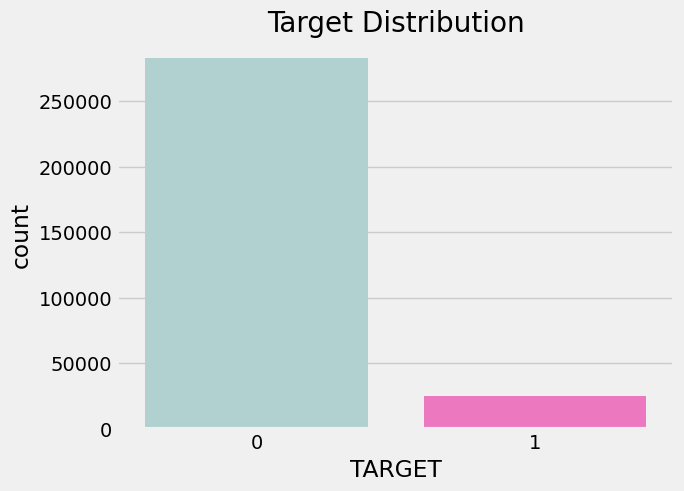

In [ ]:
# Review target distribution
sns.countplot(x='TARGET', data=train_data, palette=['#aad7d4', '#ff66c4'])
plt.title('Target Distribution')
plt.show()


This is an imbalanced class problem. The number of loans repaid on time significantly outweighs the number of loans not repaid. In advanced machine learning models, adjusting the class weights can help address this imbalance.

Examine Missing Values


In [ ]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# Calculate the count and percentage of missing values
missing_values = train_data.isnull().sum()
missing_percentage = train_data.isnull().mean() * 100

# Combine them into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage (%)': missing_percentage
})

# Filter columns with missing values only and sort by percentage
missing_summary = missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Percentage (%)', ascending=False)

print(missing_summary)


                          Missing Count  Missing Percentage (%)
COMMONAREA_MEDI                  214865               69.872297
COMMONAREA_AVG                   214865               69.872297
COMMONAREA_MODE                  214865               69.872297
NONLIVINGAPARTMENTS_MEDI         213514               69.432963
NONLIVINGAPARTMENTS_MODE         213514               69.432963
...                                 ...                     ...
EXT_SOURCE_2                        660                0.214626
AMT_GOODS_PRICE                     278                0.090403
AMT_ANNUITY                          12                0.003902
CNT_FAM_MEMBERS                       2                0.000650
DAYS_LAST_PHONE_CHANGE                1                0.000325

[67 rows x 2 columns]


There are 67 columns that have missing values. When building machine learning models, handling missing values often involves imputation. However, some models, such as XGBoost, can handle missing data without requiring imputation. Another approach is to drop columns with a high percentage of missing values, but determining their importance to the model in advance is challenging. For now, all columns will be retained.

# Column Types

In [ ]:
# Count the number of each type of column
column_type_counts = train_data.dtypes.value_counts()

print(column_type_counts)


float64    65
int64      41
object     16
Name: count, dtype: int64


In [ ]:
# Count the number of each type of column
unique_counts = train_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

print(unique_counts)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64


The majority of categorical variables have a limited number of unique values. Determining the best approach to handle these categorical variables is essential.

In [ ]:
train_data['ORGANIZATION_TYPE'].value_counts()

,count
ORGANIZATION_TYPE,
Business Entity Type 3,67992
XNA,55374
Self-employed,38412
Other,16683
Medicine,11193
Business Entity Type 2,10553
Government,10404
School,8893
Trade: type 7,7831


# Label Encoding
**Label Encoding** for categorical variables with only 2 categories.


In [ ]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train_data:
    if train_data[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train_data[col].unique())) <= 2:
            # Train on the training data
            le.fit(train_data[col])
            # Transform both training and testing data
            train_data[col] = le.transform(train_data[col])
            test_data[col] = le.transform(test_data[col])

            # Keep track of how many columns were label encoded
            le_count += 1

print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


# One-Hot Encoding
**One-Hot Encoding** for categorical variables with more than 2 categories.

In [ ]:
# one-hot encoding for categorical variables
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

print('Training Features Shape: ', train_data.shape)
print('Testing Features Shape: ', test_data.shape)

Training Features Shape:  (307511, 243)
Testing Features Shape:  (48744, 239)


# Aligning Training and Testing Data

In [ ]:
train_labels = train_data['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
train_data, test_data = train_data.align(test_data, join = 'inner', axis = 1)

# Add the target back in
train_data['TARGET'] = train_labels

print('Training Features shape: ', train_data.shape)
print('Testing Features shape: ', test_data.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


# Back to Exploratory Data Analysis

### Anomalies

During EDA, identifying anomalies in the data is crucial as they might arise from typing errors, faulty measurement tools, or extreme but valid values. The `describe` method can be used to quantitatively examine a column's statistics for potential anomalies. For example, negative values in the `DAYS_BIRTH` column represent ages relative to the current loan application. To interpret these values in years, they can be multiplied by -1 and divided by the number of days in a year.

In [ ]:
(train_data['DAYS_BIRTH'] / -365).describe()

,DAYS_BIRTH
count,307511.000000
mean,43.936973
std,11.956133
min,20.517808
25%,34.008219
50%,43.150685
75%,53.923288
max,69.120548


In [ ]:
train_data['DAYS_EMPLOYED'].describe()

,DAYS_EMPLOYED
count,307511.000000
mean,63815.045904
std,141275.766519
min,-17912.000000
25%,-2760.000000
50%,-1213.000000
75%,-289.000000
max,365243.000000


That doesn't seem correct. The maximum value, aside from being positive, is about 1000 years.

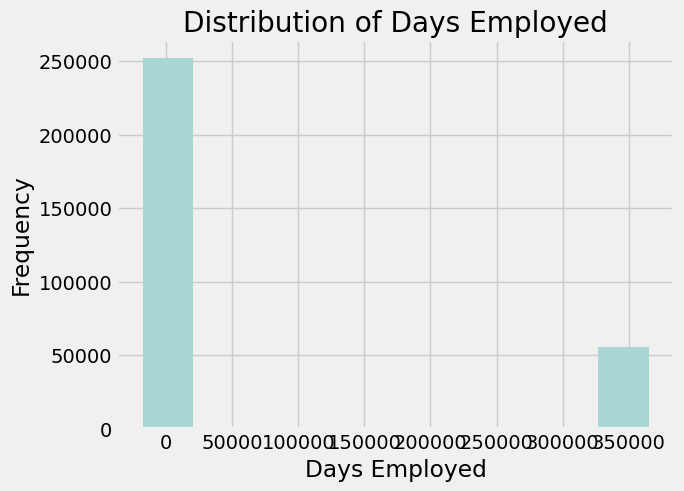

In [ ]:
train_data['DAYS_EMPLOYED'].plot.hist(color='#aad7d4', title='Distribution of Days Employed')
plt.xlabel('Days Employed')
plt.show()

For curiosity, the anomalous clients can be isolated to see if they have higher or lower default rates compared to the other clients.

In [ ]:
anom = train_data[train_data['DAYS_EMPLOYED'] == 365243]
non_anom = train_data[train_data['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


The anomalies show a lower default rate, which is an interesting observation. Handling anomalies varies depending on the context, but a cautious approach involves treating them as missing values and imputing them later. Since all anomalies share the same value, they likely represent a common trait. To ensure the machine learning model can account for these anomalies, the values will be replaced with `np.nan`, and a boolean column will be added to indicate whether a value was anomalous.

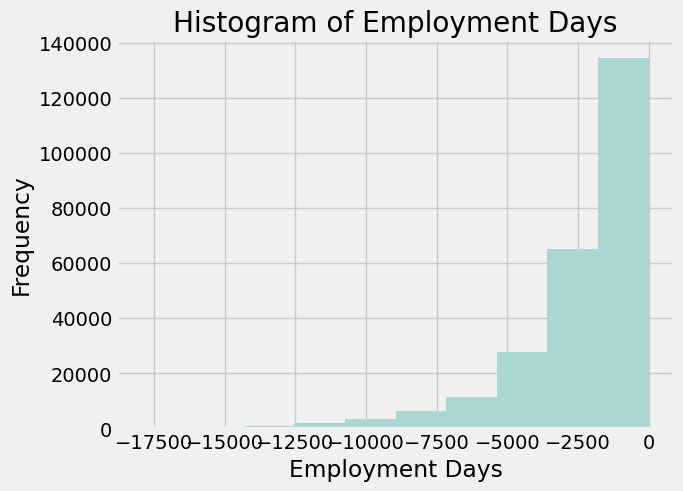

In [ ]:
# Create an anomalous flag column
train_data['DAYS_EMPLOYED_ANOM'] = train_data["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace=True)

# Plot the histogram with updated color and title
train_data['DAYS_EMPLOYED'].plot.hist(color='#aad7d4', title='Histogram of Employment Days');
plt.xlabel('Employment Days');

The distribution now aligns with expectations, with a new column marking initially anomalous values. Adjustments made to the training data, including handling missing values, must also be applied to the testing data.

In [ ]:
test_data['DAYS_EMPLOYED_ANOM'] = test_data["DAYS_EMPLOYED"] == 365243
test_data["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_data["DAYS_EMPLOYED_ANOM"].sum(), len(test_data)))

There are 9274 anomalies in the test data out of 48744 entries


# Correlations

.00-.19 "very weak"

.20-.39 "weak"

.40-.59 "moderate"

.60-.79 "strong"

.80-1.0 "very strong"

In [ ]:
# Find correlations with the target and sort
correlations = train_data.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

### Effect of Age on Repayment

In [ ]:
# Find the correlation of the positive days since birth and target
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH'])
train_data['DAYS_BIRTH'].corr(train_data['TARGET'])

-0.07823930830982694

Interpretation of the correlation between `DAYS_BIRTH` (age) and `TARGET`:

- **Correlation Value**: The correlation is **-0.0782**, indicating a very weak negative relationship between age and the target (default likelihood).
- **Meaning**:
  - The negative value suggests that as a person's age increases (higher `DAYS_BIRTH`), there is a slight tendency for the target to be 0 (non-default).
  - However, since the correlation value is very close to zero, this relationship is almost negligible and does not strongly influence the prediction of the target.

In conclusion, age may not be a highly significant factor for predicting default in this dataset, but there could be more complex patterns worth further exploration.

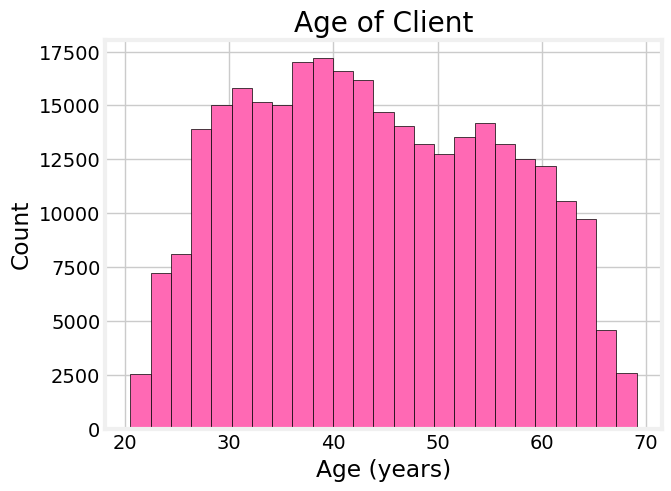

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years with color #FF69B4
plt.hist(train_data['DAYS_BIRTH'] / 365, edgecolor='k', bins=25, color='#FF69B4')

# Title and labels
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
# Show the plot
plt.show()


The age distribution shows no outliers, as all ages fall within a reasonable range. To analyze the impact of age on the target, we will create a kernel density estimation (KDE) plot, which visualizes the distribution of a single variable as a smooth curve. This is achieved by averaging kernels (typically Gaussian) computed at each data point. We'll use Seaborn's `kdeplot` for this purpose, with the plot colored by target values.

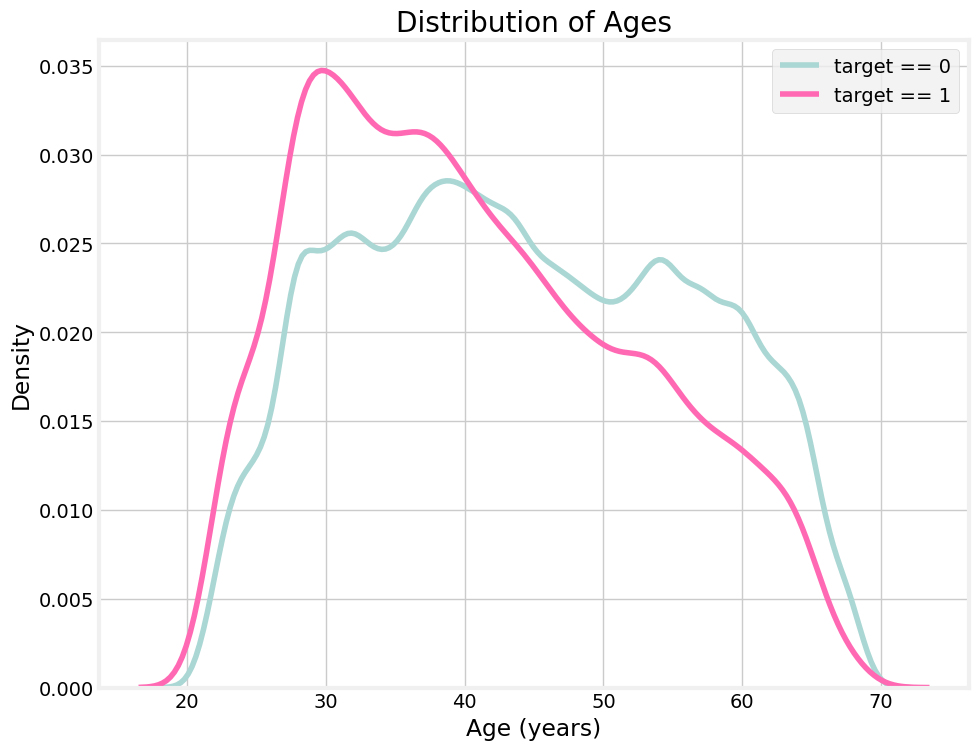

In [ ]:
plt.figure(figsize=(10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(
    train_data.loc[train_data['TARGET'] == 0, 'DAYS_BIRTH'] / 365,
    label='target == 0',
    color='#aad7d4'
)

# KDE plot of loans which were not repaid on time
sns.kdeplot(
    train_data.loc[train_data['TARGET'] == 1, 'DAYS_BIRTH'] / 365,
    label='target == 1',
    color='#FF69B4'
)

# Labeling of plot
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')
plt.legend()
plt.show()

Younger clients are slightly more likely to fail to repay loans, as shown by the target curve skewing younger. Although the correlation is weak (-0.07), this variable could still be useful for a machine learning model.

In [ ]:
# Age information into a separate dataframe
age_data = train_data[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


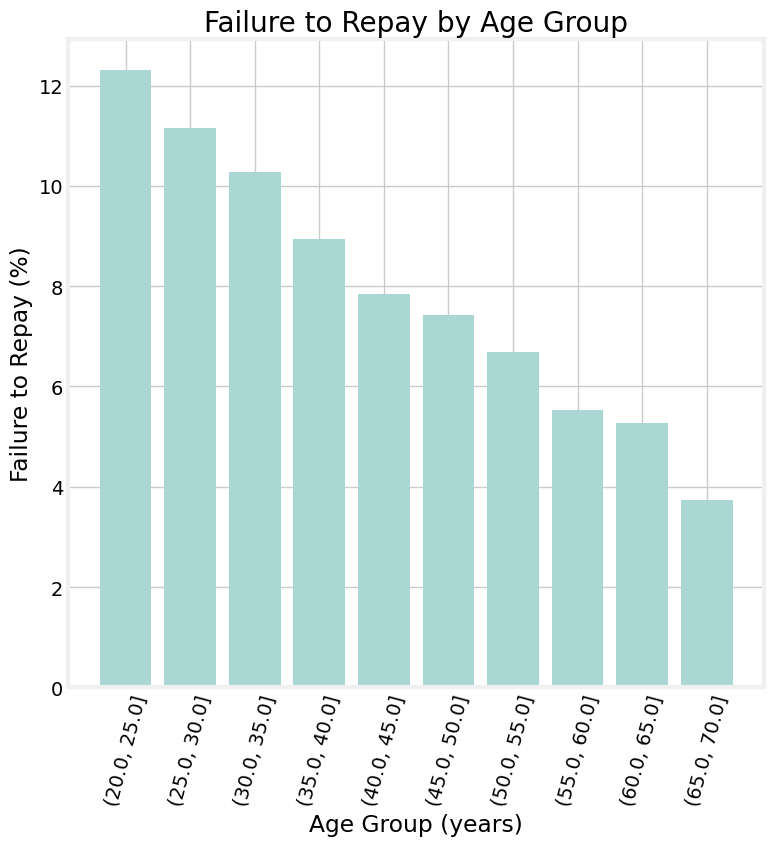

In [ ]:
# Set figure size
plt.figure(figsize=(8, 8))

# Set background color of the figure and the axes to white
plt.gcf().set_facecolor('white')
ax = plt.gca()
ax.set_facecolor('white')

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'], color='#aad7d4')

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

# Show the plot
plt.show()


- Younger applicants have a higher likelihood of loan default, with over 10% failure rates in the youngest age groups and below 5% in the oldest.  
- Banks could use this insight to support younger clients with financial guidance or planning, rather than discriminating against them.

### Exterior Sources
The variables `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3` exhibit the most significant negative correlations with the target. These variables likely represent "normalized scores from external data sources," which may reflect overall credit ratings. The next step is to analyze their correlations with the target as well as their relationships with each other.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = train_data[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


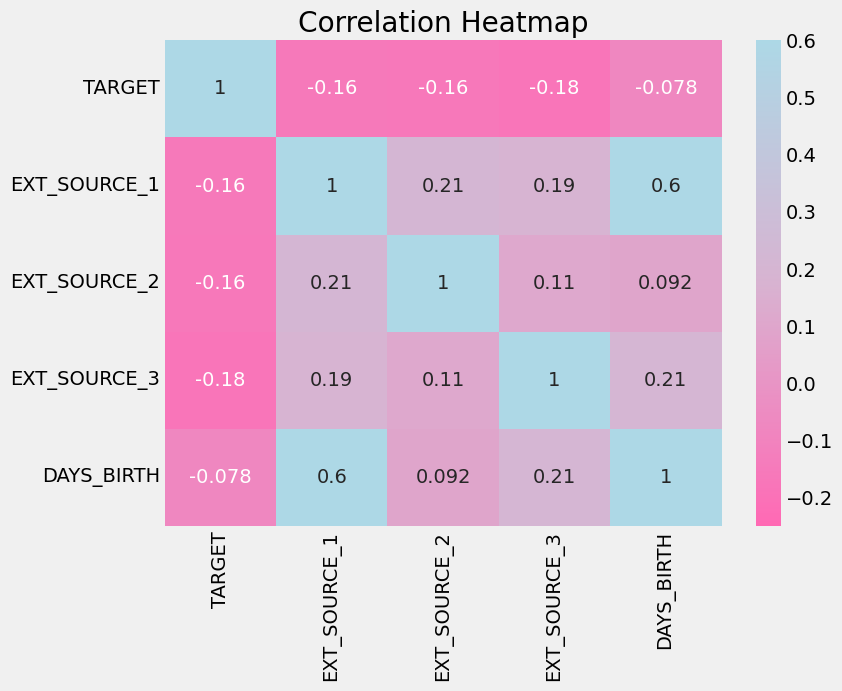

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#FF69B4", "#D8B3D1", "#ADD8E6"]
custom_cmap = LinearSegmentedColormap.from_list("pink_blue_purple", colors)

# Create the heatmap with the custom colormap
plt.figure(figsize=(8, 6))

sns.heatmap(
    ext_data_corrs,
    cmap=custom_cmap,
    vmin=-0.25,
    annot=True,
    vmax=0.6
)

plt.title('Correlation Heatmap')
plt.show()


- The `EXT_SOURCE` features negatively correlate with the target, suggesting higher scores indicate a greater likelihood of loan repayment.  
- A positive correlation between `DAYS_BIRTH` and `EXT_SOURCE_1` hints that client age might influence this score.

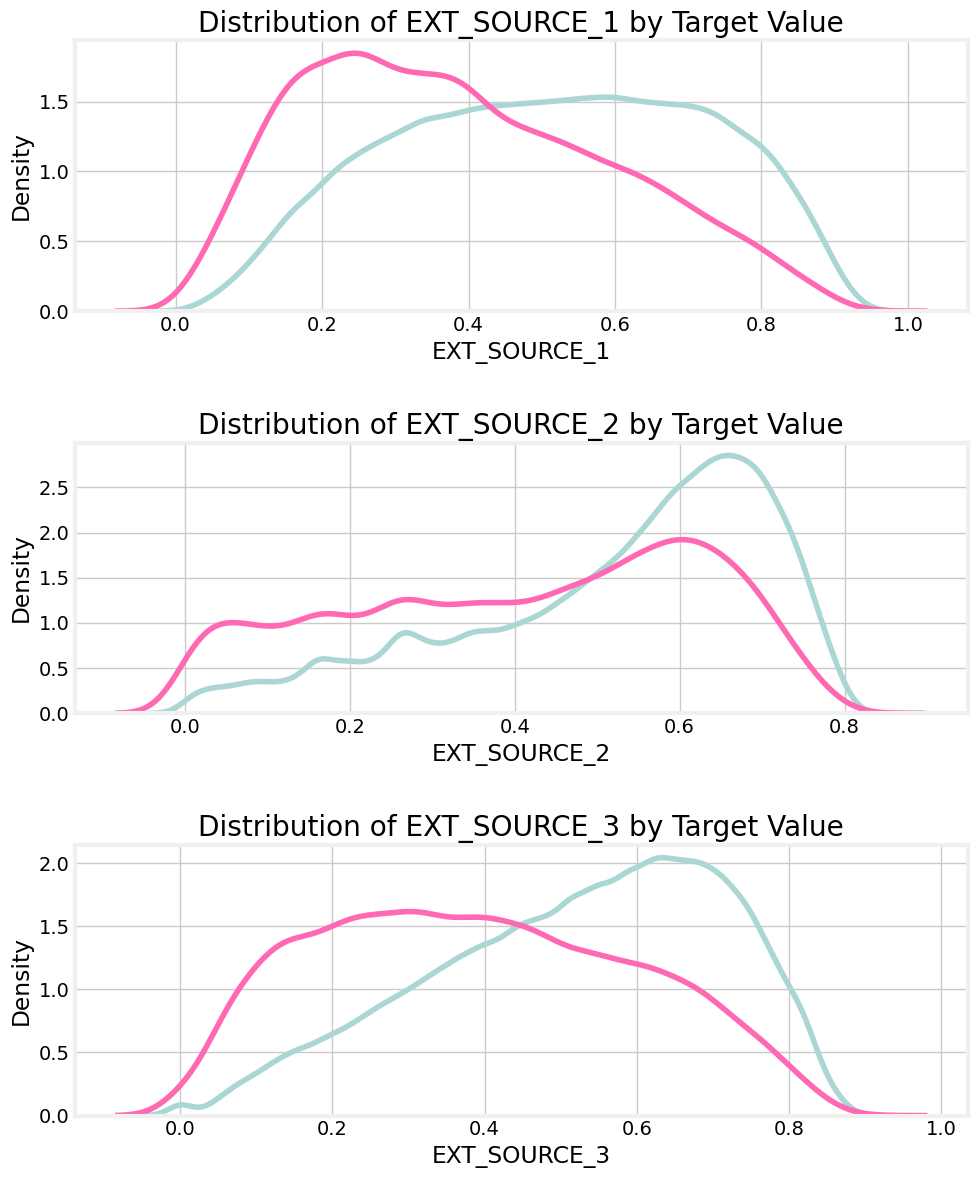

In [ ]:
plt.figure(figsize=(10, 12))

# Iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # Create a new subplot for each source
    plt.subplot(3, 1, i + 1)

    # Plot repaid loans with color #aad7d4
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 0, source], label='target == 0', color='#aad7d4')

    # Plot loans that were not repaid with color #FF69B4
    sns.kdeplot(train_data.loc[train_data['TARGET'] == 1, source], label='target == 1', color='#FF69B4')

    # Label the plots
    plt.title(f'Distribution of {source} by Target Value')
    plt.xlabel(source)
    plt.ylabel('Density')
    plt.gca().set_facecolor('white')
    plt.gcf().set_facecolor('white')

plt.tight_layout(h_pad=2.5)
plt.show()


`EXT_SOURCE_3` shows the largest difference by target value, indicating a weak but useful relationship with loan repayment likelihood for machine learning models.  

# Feature Engineering

* `CREDIT_INCOME_PERCENT`: the percentage of the credit amount relative to a client's income
* `ANNUITY_INCOME_PERCENT`: the percentage of the loan annuity relative to a client's income
* `CREDIT_TERM`:  the length of the payment in months (since the annuity is the monthly amount due
* `DAYS_EMPLOYED_PERCENT`: the percentage of the days employed relative to the client's age

In [ ]:
train_data_domain = train_data.copy()
test_data_domain = test_data.copy()

train_data_domain['CREDIT_INCOME_PERCENT'] = train_data_domain['AMT_CREDIT'] / train_data_domain['AMT_INCOME_TOTAL']
train_data_domain['ANNUITY_INCOME_PERCENT'] = train_data_domain['AMT_ANNUITY'] / train_data_domain['AMT_INCOME_TOTAL']
train_data_domain['CREDIT_TERM'] = train_data_domain['AMT_ANNUITY'] / train_data_domain['AMT_CREDIT']
train_data_domain['DAYS_EMPLOYED_PERCENT'] = train_data_domain['DAYS_EMPLOYED'] / train_data_domain['DAYS_BIRTH']

In [ ]:
test_data_domain['CREDIT_INCOME_PERCENT'] = test_data_domain['AMT_CREDIT'] / test_data_domain['AMT_INCOME_TOTAL']
test_data_domain['ANNUITY_INCOME_PERCENT'] = test_data_domain['AMT_ANNUITY'] / test_data_domain['AMT_INCOME_TOTAL']
test_data_domain['CREDIT_TERM'] = test_data_domain['AMT_ANNUITY'] / test_data_domain['AMT_CREDIT']
test_data_domain['DAYS_EMPLOYED_PERCENT'] = test_data_domain['DAYS_EMPLOYED'] / test_data_domain['DAYS_BIRTH']

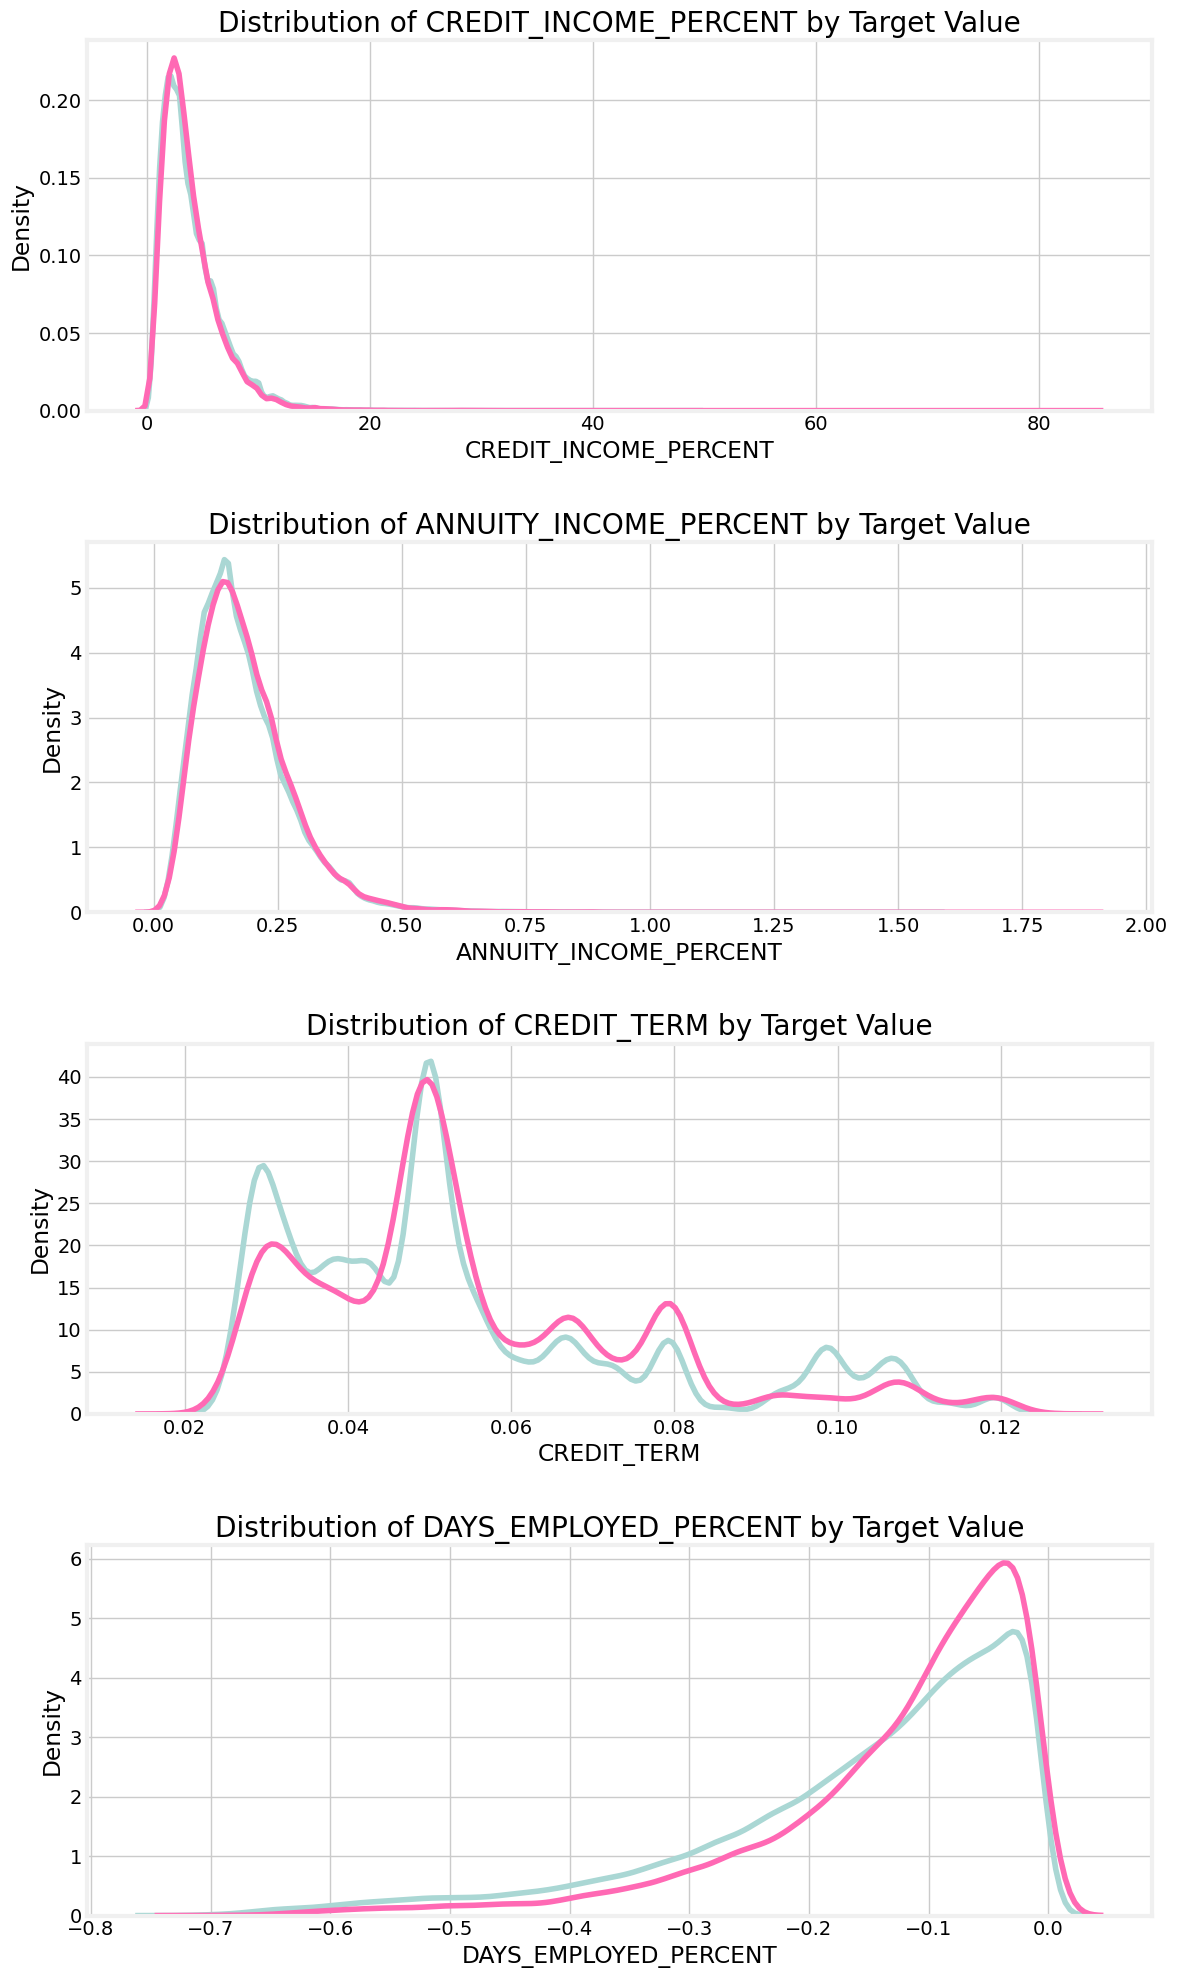

In [ ]:
plt.figure(figsize=(12, 20))

# Iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    # Create a new subplot for each feature
    plt.subplot(4, 1, i + 1)

    # Plot repaid loans with color #aad7d4
    sns.kdeplot(train_data_domain.loc[train_data_domain['TARGET'] == 0, feature], label='target == 0', color='#aad7d4')

    # Plot loans that were not repaid with color #FF69B4
    sns.kdeplot(train_data_domain.loc[train_data_domain['TARGET'] == 1, feature], label='target == 1', color='#FF69B4')

    # Label the plots
    plt.title(f'Distribution of {feature} by Target Value')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.gca().set_facecolor('white')
    plt.gcf().set_facecolor('white')
plt.tight_layout(h_pad=2.5)
plt.show()


It is difficult to determine in advance whether these new features will be beneficial. The only way to know for certain is to try them out directly.

# Logistic Regression

In [ ]:
# # Drop the target from the training data
# if 'TARGET' in train_data:
#     train = train_data.drop(columns = ['TARGET'])
# else:
#     train = app_train.copy()
train_data2 = train_data.dropna()
train = train_data2.drop(columns=['TARGET'])
label = train_data2['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25, random_state=2023)

In [ ]:
# Make the model with the specified regularization parameter
log_reg = RandomForestClassifier(random_state=42, max_depth=3, class_weight="balanced")

# Train on the training data
log_reg.fit(x_train, y_train)

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(x_test)[:, 1]
log_reg_pred_train = log_reg.predict_proba(x_train)[:, 1]

print(roc_auc_score(y_test, log_reg_pred))
print(roc_auc_score(y_train, log_reg_pred_train))

0.6937862370497101
0.7792194801027824


In [ ]:
# Extract feature importances
features = list(train.columns)
feature_importance_values = log_reg.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

In [ ]:
# Make the model with the specified regularization parameter
log_reg2 = LogisticRegression(random_state=42)

# Train on the training data
log_reg2.fit(x_train, y_train)

# Make predictions
# Make sure to select the second column only
log_reg_pred2 = log_reg2.predict_proba(x_test)[:, 1]
log_reg_pred_train2 = log_reg2.predict_proba(x_train)[:, 1]

print(roc_auc_score(y_test, log_reg_pred2))
print(roc_auc_score(y_train, log_reg_pred_train2))

0.6016609637867122
0.6139459826736878


In [ ]:
# # Drop the target from the training data
# if 'TARGET' in train_data:
#     train = train_data.drop(columns = ['TARGET'])
# else:
#     train = train_data.copy()

train = train_data.drop(columns=['TARGET'])
label = train_data['TARGET']

x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.25)

# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_data.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(x_train)

# Transform both training and testing data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

# Repeat with the scaler
scaler.fit(x_train)
train = scaler.transform(x_train)
test = scaler.transform(x_test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (230633, 240)
Testing data shape:  (76878, 240)


In [ ]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, y_train)

LogisticRegression(C=0.0001)

In [ ]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

print(roc_auc_score(y_test, log_reg_pred))

0.6864947719198099


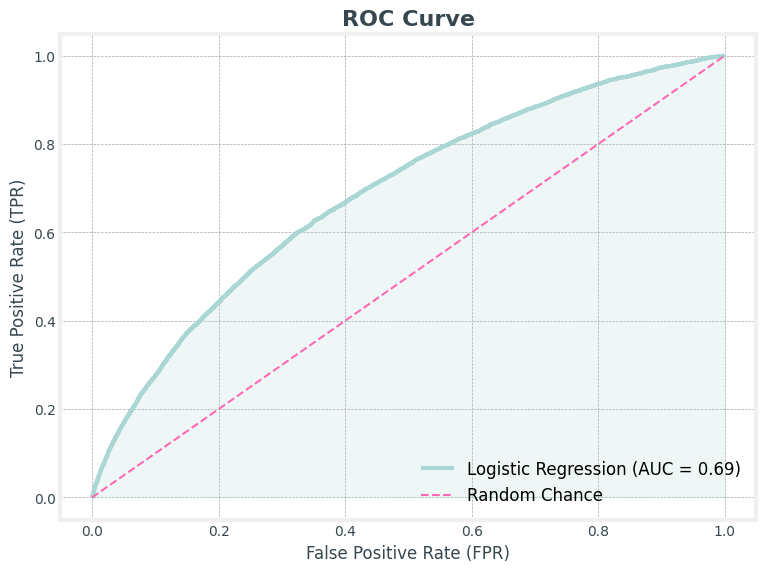

In [ ]:
# Make predictions (predict probabilities)
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_pred)

# Calculate AUC score
auc_score = roc_auc_score(y_test, log_reg_pred)

# Plot the ROC curve with custom design
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="#aad7d4", linewidth=3, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='#FF69B4', linewidth=1.5, label="Random Chance")  # Dashed diagonal in pink
plt.fill_between(fpr, tpr, color="#aad7d4", alpha=0.2)  # Light fill under the curve

# Customize the plot
plt.title("ROC Curve", fontsize=16, fontweight='bold', color="#37474F")
plt.xlabel("False Positive Rate (FPR)", fontsize=12, color="#37474F")
plt.ylabel("True Positive Rate (TPR)", fontsize=12, color="#37474F")
plt.xticks(fontsize=10, color="#37474F")
plt.yticks(fontsize=10, color="#37474F")
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Ensure background is white
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.show()


## Improved Model: Random Forest

To try and beat the poor performance of our baseline, we can update the algorithm. Let's try using a Random Forest on the same training data to see how that affects performance. The Random Forest is a much more powerful model especially when we use hundreds of trees. We will use 100 trees in the random forest.

In [ ]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train on the training data
random_forest.fit(train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.2min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished


In [ ]:
print(roc_auc_score(y_test, predictions))

0.7099306862836453


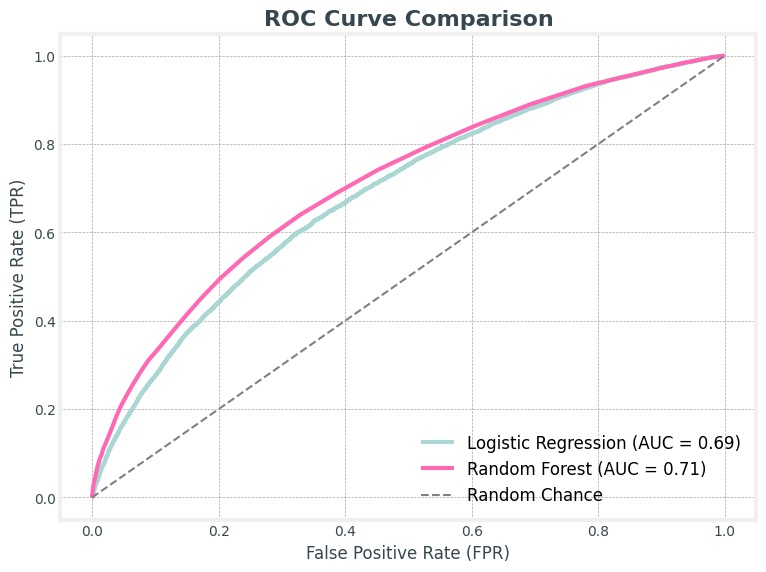

In [ ]:
# Logistic Regression predictions
log_reg_pred = log_reg.predict_proba(test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg_pred)
auc_log = roc_auc_score(y_test, log_reg_pred)

# Random Forest predictions
random_forest = RandomForestClassifier(n_estimators=100, random_state=50, n_jobs=-1)
random_forest.fit(train, y_train)
rf_pred = random_forest.predict_proba(test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
auc_rf = roc_auc_score(y_test, rf_pred)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color="#aad7d4", linewidth=3, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, color="#FF69B4", linewidth=3, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.5, label="Random Chance")

# Customize plot
plt.title("ROC Curve Comparison", fontsize=16, fontweight='bold', color="#37474F")
plt.xlabel("False Positive Rate (FPR)", fontsize=12, color="#37474F")
plt.ylabel("True Positive Rate (TPR)", fontsize=12, color="#37474F")
plt.xticks(fontsize=10, color="#37474F")
plt.yticks(fontsize=10, color="#37474F")
plt.legend(loc="lower right", fontsize=12, frameon=False)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Ensure white background
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Show the plot
plt.show()
